In [0]:
#Unzip the Dataset
!unzip Dataset

In [ ]:
#import neccessary modules
import os 
import shutil
import glob
import vmmr_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Dividing the dataset for finding most stolen  cars and visualizing them
cars = {
    "honda_civic_1998": ["honda_civic_1997", "honda_civic_1998"], # available "honda_civic_1999"
    "honda_accord_1997": ["honda_accord_1996", "honda_accord_1997"],
    "ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    "chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    "toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    "dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    "gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    "chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]
}


full_dataset_path = "../Dataset/SubsetVMMR"
stolen_cars_path = "../Dataset/Most_Stolen_Cars"

if os.path.exists(stolen_cars_path):
    shutil.rmtree(stolen_cars_path)
else:
    os.makedirs(stolen_cars_path)

for directory, car_list in cars.items():
    print("Creating", directory)
    car_directory_name = os.path.join(stolen_cars_path, directory)
    os.makedirs(car_directory_name)
    for car in car_list:
        path = os.path.join(full_dataset_path, car, "")
        files = glob.glob(path + '*.jpg')
        for file in files:
            shutil.copy(file, car_directory_name)

vmmr_utils.display_images(stolen_cars_path)

###  Remove Invalid, Corrupt and Non-JPG files

we remove images that are not in ".jpg" format or that can not be read by cv2 module. 


In [ ]:
from multiprocessing import Pool

#Check Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(stolen_cars_path + "/*/*")
    pool.map(vmmr_utils.check_image, image_list)
    pool.close()

print('Done.')

###  Distribution of Selected Classes


Now, we can take a look at the class distribution of our problem statement. We're importing PyGal and creating a wrapper for rendering the chart inline, then passing in our data to the charting function.



In [2]:
import pygal 
from IPython.display import display, HTML
#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Stolen Car Class Distribution'
for o in os.listdir(stolen_cars_path):
    line_chart.add(o, len(os.listdir(os.path.join(stolen_cars_path, o))))
galplot(line_chart)

NameError: name 'os' is not defined

### 2.3 Confirm Folder Structure is Correct

To summarize and confirm our progress, we can take a look at the folder tree structure in **Most_Stolen_Cars** to take a look at our images we used to create a smaller subset. 



In [0]:
#Confirm Folder Structure
for root, dirs, files in os.walk(stolen_cars_path):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))        

Most_Stolen_Cars/
    chevrolet_impala_2008/
        00000_8xV8B4TpKMW_600x450.jpg
        00101_7geWW6fvNQD_600x450.jpg
        ...
    chevrolet_silverado_2004/
        2003 1500 chevy silverado_00E0E_gcAlN1wRYXi_600x450.jpg
        2003 1500 chevy silverado_00L0L_7y62NcvCcsY_600x450.jpg
        ...
    dodge_ram_2001/
        1995 Dodge Ram 1500 Series_00B0B_edKEc6hVTw4_600x450.jpg
        1995 Dodge Ram 1500 Series_00H0H_1afjSkOKh4E_600x450.jpg
        ...
    ford_f150_2006/
        2005 F-150 Ford Crew Cab_00g0g_130pGW7DYor_600x450.jpg
        2005 F-150 Ford Crew Cab_00q0q_44k9khAOtOG_600x450.jpg
        ...
    gmc_sierra_2012/
        2007 Gm Sierra_00m0m_4i1UirplpqZ_600x450.jpg
        2007 Gm Sierra_00o0o_eB0mcdwxXQK_600x450.jpg
        ...
    honda_accord_1997/
        00000_5GwDIYYFadY_600x450.jpg
        00000_hvGK7QetNWt_600x450.jpg
        ...
    honda_civic_1998/
        00000_8tz5dxzg7te_600x450.jpg
        00000_exCv14ALbej_600x450.jpg
        ...
    nissan_altima

### Create Train, Validation and Test Folders


We need to create training, validation and test folders for data ingestion and we'll use 0.7, 0.1, 0.2 ratio for this purpose.


In [0]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.1,.2) # 70/10/20 Data Split
test_folder = '../Dataset/test/'
train_folder = '../Dataset/train/'
val_folder = '../Dataset/val/'

file_names = os.listdir('../Dataset/Most_Stolen_Cars')

#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(stolen_cars_path + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")  

Moving 612 train images to category folder chevrolet_impala_2008
Moving 87 validation images to category folder chevrolet_impala_2008
Moving 176 test images to category folder chevrolet_impala_2008
Moving 570 train images to category folder chevrolet_silverado_2004
Moving 81 validation images to category folder chevrolet_silverado_2004
Moving 164 test images to category folder chevrolet_silverado_2004
Moving 349 train images to category folder dodge_ram_2001
Moving 49 validation images to category folder dodge_ram_2001
Moving 101 test images to category folder dodge_ram_2001
Moving 615 train images to category folder ford_f150_2006
Moving 87 validation images to category folder ford_f150_2006
Moving 177 test images to category folder ford_f150_2006
Moving 298 train images to category folder gmc_sierra_2012
Moving 42 validation images to category folder gmc_sierra_2012
Moving 87 test images to category folder gmc_sierra_2012
Moving 452 train images to category folder honda_accord_1997
M

### Sample Augmentation

We can see that certain classes were significantly lower than others.  To help mitigate that issue we're going to augment some of our data set so that we have a dataset that is more closely distributed. So we're taking a look at an example image and showing the effets of augmentation given a certain threshold of modification.  Then we're going to apply these random augmentations to our data.


C:\Users\rauna\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


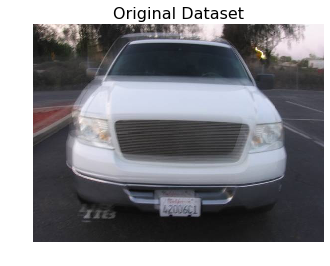

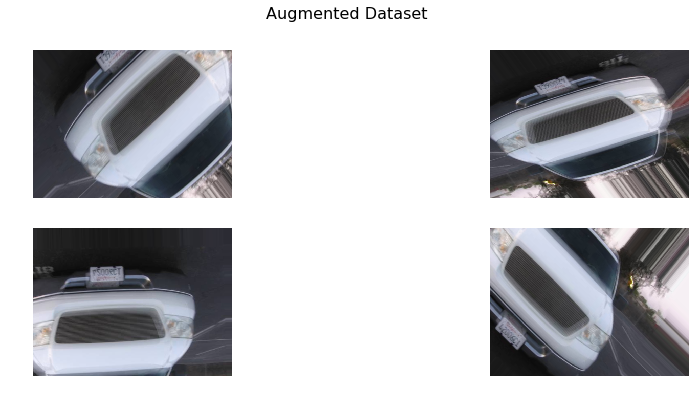

In [0]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Select a random image and follow the next step
datagen = ImageDataGenerator(rotation_range=45, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.3, 
                             vertical_flip=True,
                             horizontal_flip=True, 
                             fill_mode="nearest")
#Load example image
file_list = glob.glob("../Dataset/test/*/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)
#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented " + car_class, fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

### Finalize Augmented Dataset for Training 

By using the augmentation techniques we have learned, we can oversample minority classes in training set. We are not going to do these steps in validation or test in order not to create any bias on the data. 



In [0]:
#Oversampling Minority Classes in Training Set
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)
    datagen = ImageDataGenerator(rotation_range=45, 
        horizontal_flip=True, 
        fill_mode="nearest")
    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)
        img = load_img(tmp_img_name)
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)

        batch = datagen.flow(img, 
            batch_size=1, 
            seed=21,
            save_to_dir=data_dir, 
            save_prefix=img_name.split(".jpg")[0] + "augmented", 
            save_format="jpg")

        batch.next()

classes_to_augment = [
    "toyota_camry_2014",
    "nissan_altima_2014",
    "toyota_corolla_2013",
    "gmc_sierra_2012"]

for class_names in classes_to_augment:
    print("Currently Augmenting:", class_names)
    data_dir = os.path.join(train_folder, class_names)
    data_augment(data_dir)

Currently Augmenting: toyota_camry_2014
Currently Augmenting: nissan_altima_2014
Currently Augmenting: toyota_corolla_2013
Currently Augmenting: gmc_sierra_2012


### Resize Images


 we need to resize the images with the expected image format.


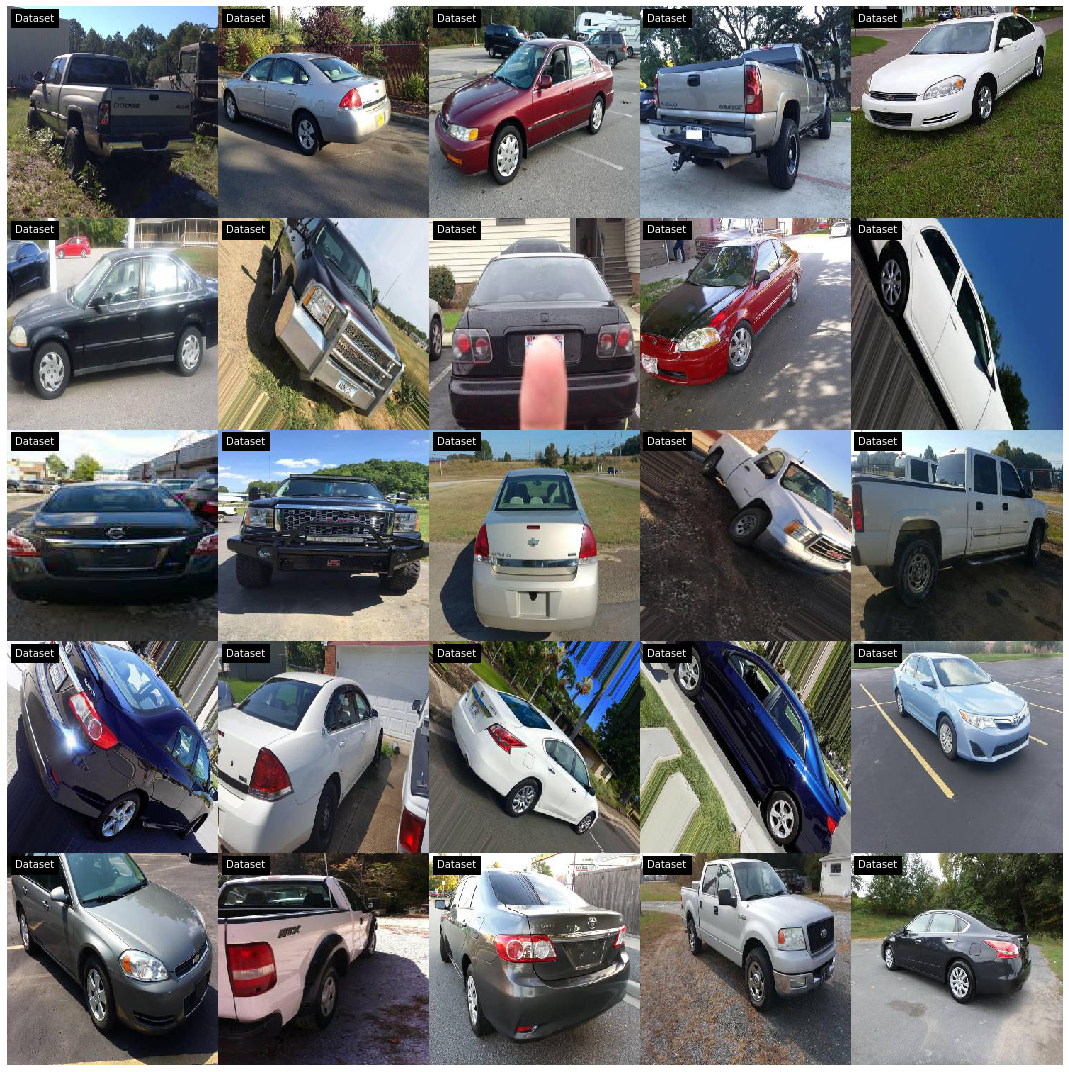

In [0]:
from functools import partial

#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=299)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

### Look at Distribution of Selected Classes again



Now that we've done some augmentation to the dataset we want to see how the distribution has changed compared to before the augmentation. 



In [0]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Most Stolen Car Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)   

#Implementing  Federated Learning on  VMMR Cars Dataset

In [0]:
pip install syft

     |████████████████████████████████| 256kB 4.9MB/s 
     |████████████████████████████████| 81kB 25.3MB/s 
     |████████████████████████████████| 460kB 48.9MB/s 
     |████████████████████████████████| 256kB 47.1MB/s 
     |████████████████████████████████| 389kB 47.2MB/s 
     |████████████████████████████████| 2.1MB 48.6MB/s 
     |████████████████████████████████| 204kB 49.5MB/s 
     |████████████████████████████████| 51kB 22.1MB/s 
     |████████████████████████████████| 266kB 53.2MB/s 
     |████████████████████████████████| 122kB 52.3MB/s 
  Created wheel for zstd: filename=zstd-1.4.1.0-cp36-cp36m-linux_x86_64.whl size=1067067 sha256=b0127db09646161dec4f0c10ae34c796f08426b0ef3a1f6532227f68a978241f
  Stored in directory: /root/.cache/pip/wheels/66/3f/ee/ac08c81af7c1b24a80c746df669ea3cb37542d27877d66ccf4
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44105 sha256=065bc9cbec84766f583628094550f22e7fabae0a1f9817a367609016d3c00c48
  Stored in di

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
import syft as sy
hook = sy.TorchHook(torch)
# let's create two virtual workers who will hold the data while training the model locally
user_1 = sy.VirtualWorker(hook, id = "user_1")
user_2 = sy.VirtualWorker(hook, id = "user_2")

W0819 08:43:12.391815 140071924684672 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/usr/local/lib/python3.6/dist-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0819 08:43:12.413141 140071924684672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [0]:
# This  class is simply defining all the hyperparameters of the model we are going to train on
class Arguments():
    def __init__(self):
        self.batch_size = 64 # batch size for training
        self.test_batch_size = 1000 # bacth size for testing 
        self.epochs = 10 # no of epochs
        self.lr = 0.01  # setting learning rate
        self.momentum = 0.5 
        self.no_cuda = False  
        self.seed = 1
        self.log_interval = 10
        self.save_model = False

args = Arguments()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed) # sets the random seed from pytorch random number generators

device = torch.device("cuda" if use_cuda else "cpu") # choose device based on what is available if cuda or not

In [0]:
WIDTH=299
HEIGHT=299
batch_size=64
train_data = '../Dataset/train/'
# using .federate method, we can distribute our data across all the workers for now.

import torch
from torch import nn
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor

class CustomImageFolder(ImageFolder):
    def __init__(self, root, transform=None, target_transform=None):
        super(CustomImageFolder, self).__init__(str(root), transform, target_transform) 
        self.data = self.imgs

transforms = Compose([
        Resize(256),
        ToTensor(),
    ])


dataset = CustomImageFolder(train_data, transform=transforms)


workers = (user_1, user2)

federated_dataset = dataset.federate(workers)
federated_loader = sy.FederatedDataLoader(federated_dataset)

train_data.data = train_data.imgs
federated_train_loader =sy.FederatedDataLoader(train_data.federate((user_1, user_2)), batch_size=args.batch_size, shuffle=True)

In [0]:

torch.set_default_tensor_type(torch.cuda.FloatTensor) # setting the default dtyoe for all the tensors used here
# define the model CNN architechture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [0]:

def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(federated_train_loader):  
        model.send(data.location) # sending the model to the right location 
        data, target = data.to(device), target.to(device)
        # normal pytorch training
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        model.get() # one pass of training completed , now we get the model back 
        # printing each batch training progress 
        if batch_idx % args.log_interval == 0:
            loss = loss.get() # <-- NEW: get the loss back
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * args.batch_size, len(train_loader) * args.batch_size, #batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [0]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr) 

for epoch in range(1, args.epochs + 1):
    train(args, model, device, federated_train_loader, optimizer, epoch)
   

## Citations

A Large and Diverse Dataset for Improved Vehicle Make and Model Recognition
F. Tafazzoli, K. Nishiyama and H. Frigui
In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops 2017. 
